In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.decomposition

In a linear model, the variance of the coefficients is the standard error of the model.

$ y = X\beta + \epsilon $ <br>
$\epsilon \sim N(0, \sigma^2I)$ <br>
$Var(\hat{\beta}) = \sigma^2(X'X)^-1$

See [this post for explanation](https://stats.stackexchange.com/questions/44838/
how-are-the-standard-errors-of-coefficients-calculated-in-a-regression/44841#44841)

A linear model with white noise

In [2]:
# setup of linear eq
N = 1000
d = 10
sigma = 3

# compute linear eq w noise
beta = np.random.randint(-10, 10, size=(d,))
X = np.random.normal(size=(N, d))
eps = np.random.normal(size=(N,))*sigma
y = X.dot(beta) + eps

In [5]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              3373.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                        0.00
Time:                        08:49:32   Log-Likelihood:                         -2517.1
No. Observations:                1000   AIC:                                      5054.
Df Residuals:                     990   BIC:                                      5103.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [6]:
result.resid.mean(), result.resid.std()

(0.026218305517593764, 2.998569984607717)

<br>

When X has collinearity

In [7]:
# setup of linear eq
N = 1000
d = 10
sigma = 1.5

# compute linear eq w noise
beta = np.random.randint(-10, 10, size=(d+2,))
X = np.random.normal(size=(N, d))

# add correlated columns
X = np.hstack((
    X, 
    2*X[:, 2].reshape(N, 1) + np.random.normal(size=(N,1))*sigma, 
    (X[:, 1]-0.5*X[:, 4]).reshape(N, 1) + np.random.normal(size=(N,1))*sigma
))

eps = np.random.normal(size=(N,))*sigma
y = X.dot(beta) + eps

In [8]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.517e+04
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                        0.00
Time:                        08:49:34   Log-Likelihood:                         -1810.8
No. Observations:                1000   AIC:                                      3646.
Df Residuals:                     988   BIC:                                      3704.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
model = sm.OLS(y, X)
result = model.fit_regularized(method='elastic_net', alpha=1.5, L1_wt=1, refit=True)
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.319e+04
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                        0.00
Time:                        08:49:35   Log-Likelihood:                         -2276.6
No. Observations:                1000   AIC:                                      4571.
Df Residuals:                     991   BIC:                                      4615.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:
var_names = [f'x{ix}' for ix in range(1, len(X.T) + 1)]
ix = pd.Series(var_names)
R = pd.DataFrame(np.cov(X.T), columns=var_names, index=ix)
R

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
x1,0.930671,-0.040917,0.015117,0.016305,0.059364,-0.000228,0.008722,-0.019167,-0.038330,-0.027513,0.044358,-0.091974
x2,-0.040917,0.971415,-0.003823,0.041358,0.001801,0.028597,0.029445,0.004457,-0.054036,0.000894,-0.073868,0.999276
x3,0.015117,-0.003823,1.001772,-0.020523,0.058826,-0.001177,0.014391,-0.024609,-0.003775,-0.011377,2.034341,-0.080379
x4,0.016305,0.041358,-0.020523,1.042629,0.012934,0.003631,-0.000329,0.054568,0.020131,-0.003595,-0.094119,0.016465
x5,0.059364,0.001801,0.058826,0.012934,0.991453,-0.004357,-0.062342,0.001472,-0.031922,0.054741,0.077942,-0.498300
x6,-0.000228,0.028597,-0.001177,0.003631,-0.004357,0.877628,0.028137,0.054203,-0.008308,-0.051066,-0.117205,0.100249
x7,0.008722,0.029445,0.014391,-0.000329,-0.062342,0.028137,1.034119,-0.035775,0.028609,-0.023242,0.099340,0.045511
x8,-0.019167,0.004457,-0.024609,0.054568,0.001472,0.054203,-0.035775,1.072798,0.003258,-0.008020,-0.055517,0.041984
x9,-0.038330,-0.054036,-0.003775,0.020131,-0.031922,-0.008308,0.028609,0.003258,0.979663,-0.003680,0.054061,-0.074241
x10,-0.027513,0.000894,-0.011377,-0.003595,0.054741,-0.051066,-0.023242,-0.008020,-0.003680,0.996944,-0.035941,-0.175736


In [11]:
corr = R.values.flatten()
xi = [i for j in range(len(X.T)) for i in range(len(X.T)) ]
xj = [j for j in range(len(X.T)) for i in range(len(X.T)) ]
ix = [f'x{i}, x{j}' for j in range(1, len(X.T)+1) for i in range(1, len(X.T)+1) ]
is_self = [i == j for j in range(1, len(X.T)+1) for i in range(1, len(X.T)+1) ]
Rarr = pd.DataFrame({
    "corr" : abs(corr),
    "is_self" : is_self,
    "i" : xi,
    "j" : xj
}, index=ix)

In [12]:
Rarr = Rarr[~Rarr.is_self]
Rarr.sort_values(by='corr', ascending=False).head(10)

,corr,is_self,i,j
"x11, x3",2.034341,False,10,2
"x3, x11",2.034341,False,2,10
"x12, x2",0.999276,False,11,1
"x2, x12",0.999276,False,1,11
"x12, x5",0.498300,False,11,4
"x5, x12",0.498300,False,4,11
"x11, x12",0.318706,False,10,11
"x12, x11",0.318706,False,11,10
"x10, x12",0.175736,False,9,11
"x12, x10",0.175736,False,11,9


<AxesSubplot:>

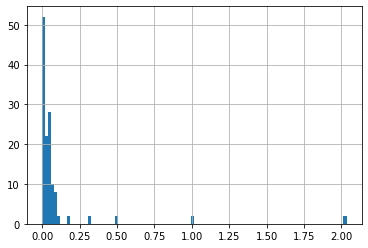

In [13]:
Rarr[~Rarr.is_self]['corr'].hist(bins=100)

Can we lasso the collinearity?

In [15]:
# get pairs that are correlated
corr_cutoff = 0.4
corr_pairs = Rarr[Rarr['corr'] > corr_cutoff]
corr_ix = set(
    np.concatenate(
        (corr_pairs['i'].values, corr_pairs['j'].values)
    )
)

for ix in corr_ix:

    # make col ix the target
    _y = X[:, ix]

    # get indices of other correlated vars
    _x_ix = [_ for _ in corr_ix if _ != ix]
    _X = X[:, _x_ix]

    # model
    model = sm.OLS(_y, _X)
    result = model.fit_regularized(method='elastic_net', alpha=0.3, L1_wt=1, refit=True)
    print(f'\n\nModeling x{ix+1}')
    print(result.summary())



Modeling x2
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.287
Model:                            OLS   Adj. R-squared (uncentered):              0.286
Method:                 Least Squares   F-statistic:                              401.4
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                    2.50e-75
Time:                        08:50:24   Log-Likelihood:                         -1235.2
No. Observations:                1000   AIC:                                      2472.
Df Residuals:                     999   BIC:                                      2477.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

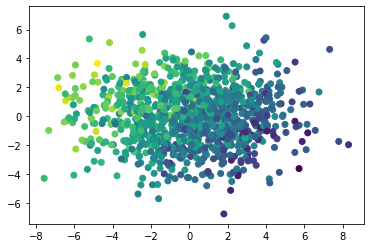

In [22]:
Xh = sklearn.decomposition.PCA(n_components=2).fit_transform(X)
plt.scatter(Xh[:,0], Xh[:,1], c=y/max(abs(y)))

<br>

A nonlinear function of x

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     243.0
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.30e-28
Time:                        06:49:57   Log-Likelihood:                -33.712
No. Observations:                  50   AIC:                             75.42
Df Residuals:                      46   BIC:                             83.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5245      0.026     20.153      0.0

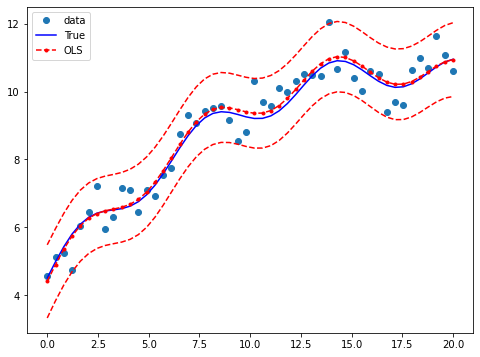

In [22]:
# nonlinear fn of x
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

# summary
res = sm.OLS(y, X).fit()
print(res.summary())

# plot
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")

In [19]:
beta

array([ 4, -1,  8,  1, -8,  9,  4, -3,  3, -3])

In [7]:
X = np.random.normal(size=(100, 10))
y = np.random.normal(size=(100))
X = sm.add_constant(X, prepend=False)
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.9065
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.531
Time:                        17:58:23   Log-Likelihood:                -145.47
No. Observations:                 100   AIC:                             312.9
Df Residuals:                      89   BIC:                             341.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0120      0.098     -0.122      0.903      -0.207       0.183
x2            -0.0109      0.119     -0.091      0.927      -0.248       0.226
x3             0.0028      0.118      0.024      0.981      -0.231       0.237
x4             0.0065      0.113      0.057      0.955      -0.219       0.231
x5             0.2435      0.110      2.216      0.029       0.025       0.462
x6            -0.0454      0.115     -0.395      0.693      -0.274       0.183
x7            -0.0755      0.119     -0.633      0.528      -0.312       0.161
x8            -0.1084      0.112     -0.972      0.334      -0.330       0.113
x9            -0.0285      0.127     -0.225      0.823      -0.280       0.223
x10            0.1621      0.105      1.536      0.128      -0.048       0.372
const          0.0662      0.116      0.572      0.569      -0.164       0.296
==============================================================================
Omnibus:                        1.328   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.819
Skew:                          -0.018   Prob(JB):                        0.664
Kurtosis:                       3.442   Cond. No.                         1.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""